## Well known recursive algorithms

Recursion is widely used, when it is natural to solve a problem using smaller subproblems. Two most well-known strategies are:
- *Tree traversal*
- *Divide-and-Conquer*. Split a problem into subparts and then aggregate the result.
  - Merge Sorting, Quick Sorting
  - Distributed summation
  - Binary search (decrease-and-conquer)
  - Karatsuba and Strassen multiplications
- *Dymanic programming*. Problem is converted into a slightly simpler problem.
  - Discrete knapsack
  - Fibonacci numbers

## Tree traversal

Tree is a natural representation of multiple tasks. We recursion can be useful to traverse both real trees (see previous materials) and imaginary. Like this.

In [ ]:
def generate_5bits(seq):
    if len(seq) > 5: return

    if len(seq) == 5: print(seq)
    generate_5bits(seq + [0])
    generate_5bits(seq + [1])

    
generate_5bits([]) 

## Divide and conquer

Impelement the remaining part of recursive binary search algorithm.
- Function `bin_search` is given a sorted list `l` of values and a reference element `v`. You need to find and index if this element `v` in a list, or return `-1` instead.
- You find a middle (median) index `m` of the list `l`. If `v` < `l[m]`, you run `bin_search` for a left half of `l`, otherwise you run `bin_search` for a right half.

Estimate it's time complexity.

999


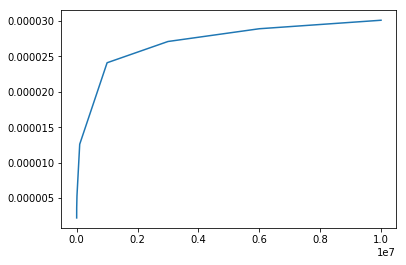

In [20]:
import matplotlib.pyplot as plt
import time

def bin_search(l, v, lower, upper):
    if lower == upper:
        return lower if lower < len(data) and l[lower] == v else -1
    else:
        m = (upper + lower) // 2
        
        # TODO: write what is missing here
        
        return bin_search(l, v, lower, upper)
      
print(bin_search(list(range(10000)), 999, 0, 10000))

times = []
datas = [100, 1000, 10000, 100000, 1000000, 3000000, 6000000, 10000000]
for i in datas:
    t = []
    for j in range(10):
        data = list(range(i))
        s = time.perf_counter()
        bin_search(data, 999.5, 0, len(data))    
        e = time.perf_counter()
        t.append(e - s)
    times.append(min(t))

plt.plot(datas, times)
plt.show()

## Dynamic programming

Consider Fibonacci sequence.

$\large F_i = F_{i-1} + F_{i-2}$

Let's implement in in few ways. Here is a naive implementation of recurrence relation. Can you estimate time complexity? Without a run?

F() is called
F() is called
F() is called
F() is called
F() is called


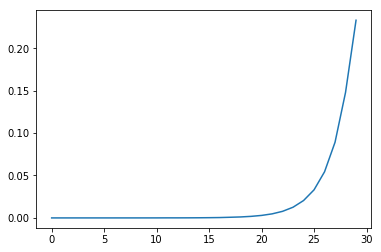

In [34]:
def naive_fib(n, verbose):
    if n == 3 and verbose: print("F() is called")
    if n < 2: return 1                                         # 
    return naive_fib(n-1, verbose) + naive_fib(n-2, verbose)   #

naive_fib(7, True)

times = []
ns = list(range(30))
for i in ns:
    t = []
    for j in range(10):
        s = time.perf_counter()
        naive_fib(i, False)    
        e = time.perf_counter()
        t.append(e - s)
    times.append(min(t))
    
plt.plot(ns, times)
plt.show()

### Memoization

Is a technique which pays memory for time. We don't have to recompute the value, if it was computed in other recursion branch. Implement memoization for Fibonacci sequence.

In [ ]:
memory = {}

def memo_fib(n):
    if n < 2: return 1
    # rewrite the code here to use memory
    x = memo_fib(n - 1)
    y = memo_fib(n - 2)
    return x + y 
    
times = []
ns = list(range(600))
for i in ns:
    t = []
    for j in range(50):
        s = time.perf_counter()
        memory = {}
        memo_fib(i)    
        e = time.perf_counter()
        t.append(e - s)
    times.append(min(t))
    
plt.plot(ns, times)
plt.show()

## Recursion and stack

Any recursive function can be rewritten using stack! Remember, just put call arguments and local variables on the stack's top.

In [67]:
def factorial(n):
    return 1 if n < 2 else n * factorial(n - 1)

def factorial_stack(n):
    stack = []
    stack.append(n)
    
    while True:
        # we read the argument
        arg = stack[-1]
        if arg < 2:
            # in this case we RETURN from the function. 
            # thus, we POP
            stack.pop()
            # we put our computation on the top of a stack
            stack.append(1)
            break    
        # here we call a function for (n-1)
        stack.append(arg - 1)
        
    while True:
        if len(stack) > 1:
            f_a_1 = stack.pop()
            a = stack.pop()
            stack.append(a * f_a_1)
        else:
            break
    
    return stack.pop()

print(factorial_stack(7))

5040


## Tail recursion

As any recursion, by definition of call stack, can be rewritten using stack, there is special type of recursion - **tail recursion**. Any tail recursion can be rewritten to a loop with NO stack (= no additional memory). This is widely used in compiler optimization. Can you do it for factorial function? For a binary search?

In [68]:
def factorial_iter(n):
    pass


def binary_search_iter(l, v):
    pass